<a href="https://colab.research.google.com/github/brian-fischer/DATA-3320/blob/main/Seattle_Weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.ncei.noaa.gov/cdo-web/search?datasetid=GHCND

# Project outline

1.  Understand the project problem. Consider ethical implications.
2.  Set up a structure for the project data and code
3.  Obtain the data
4.  Understand the contents of the data
5.  Quick check of data quality
6.  Fix any problems, if necessary
7.  Perform a quick analysis to determine whether the data are suitable for answering your questions. If not, return to step 3. If yes, then proceed. 
8.  Thoroughly clean the data. Produce a nice file that does the cleaning steps and save the cleaned data in a new file.
9.  Perform EDA. If you find problems with the data, return to 8.
10. Perform the analysis. If you find problems with the data, return to 8. If the data are insufficient, return to 3.
11. Evaluate the outcomes of the analysis
12. Communicate the results
13. Revist steps as necessary based on feedback

# Domain problem

Is it really that rainy in Seattle? My parents live in St. Louis and they think that it rains more in Seattle than St. Louis. Which city gets more rain?

## Ethics

No PII information is shared.

# Analytic approach

We will use descriptive statistics and graphical methods to compare rainfall in Seattle and St. Louis.

# Obtain the data

The NOAA National Centers for Environmental Information provides access to many types of environmental data, including records of daily precipitation.

We can use their [website](https://www.ncei.noaa.gov/cdo-web/search?datasetid=GHCND) to request records of daily precipitation from Seattle and St. Louis (or other locations of interest) for the last 5 years (2018 - 2022). 

I have already obtained the data. The data are available at this [github repository](https://github.com/brian-fischer/DATA-3320/tree/main/weather) and are called `seattle_rain.csv` and `stl_rain.csv`.

## Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='whitegrid')

## Load and explore the data sets

Load the Seattle data set

In [ ]:
df_seattle = pd.read_csv('https://raw.githubusercontent.com/brian-fischer/DATA-3320/main/weather/seattle_rain.csv')

This loads the data set as a Pandas `DataFrame`:

In [ ]:
type(df_seattle)

pandas.core.frame.DataFrame

Explore the contents of the data set.

In [ ]:
df_seattle.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
0,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/1/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
1,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/2/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
2,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/3/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
3,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/4/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
4,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/5/18,NaN,NaN,0.25,NaN,NaN,NaN,NaN


We see that we have several measurements taken, but it is not completely clear what each column represents. We can consult the [data documentation](https://www.ncei.noaa.gov/pub/data/cdo/documentation/GHCND_documentation.pdf) to see the definition of each variable.

We are interested in the precipitation measurement `PRCP` over time, which is stored in the `DATE` column.

Use the `info` method to check the data types, size of the data frame, and numbers of missing values.

In [ ]:
df_seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658 entries, 0 to 1657
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  1658 non-null   object 
 1   NAME     1658 non-null   object 
 2   DATE     1658 non-null   object 
 3   DAPR     23 non-null     float64
 4   MDPR     23 non-null     float64
 5   PRCP     1636 non-null   float64
 6   SNOW     353 non-null    float64
 7   SNWD     66 non-null     float64
 8   WESD     15 non-null     float64
 9   WESF     28 non-null     float64
dtypes: float64(7), object(3)
memory usage: 129.7+ KB


There are 1658 entries. 

`PRCP` has 1636 non-null values, which means that we are missing 22 values. In addition, over 5 years there should be 

$$5 \times 365 + 1 = 1826$$

days. This means that our records skipped some days and we should determine where the values are missing.

We also see that `DATE` is an object (string) variable type. This can work, but it is ideal to convert dates to a `datetime` data type.

In [ ]:
5 * 365 + 1

1826

Load the St. Louis data set

In [ ]:
df_stl = pd.read_csv('https://raw.githubusercontent.com/brian-fischer/DATA-3320/main/weather/stl_rain.csv')

Explore the contents of the data set.

In [ ]:
df_stl.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD
0,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-01,NaN,NaN,0.00,0.0,NaN
1,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-03,NaN,NaN,0.35,NaN,NaN
2,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-04,NaN,NaN,0.03,NaN,NaN
3,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-05,NaN,NaN,0.04,1.2,NaN
4,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-06,NaN,NaN,0.00,0.0,1.0


This data set does not contain the same columns as the Seattle data set, but it does contain precipitation measurements `PRCP` over time `DATE`.

We also see that it contains observations dating back to 2017.

Use the `info` method to check the data types, size of the data frame, and numbers of missing values.

In [ ]:
df_stl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54574 entries, 0 to 54573
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  54574 non-null  object 
 1   NAME     54574 non-null  object 
 2   DATE     54574 non-null  object 
 3   DAPR     1166 non-null   float64
 4   MDPR     1163 non-null   float64
 5   PRCP     53143 non-null  float64
 6   SNOW     33167 non-null  float64
 7   SNWD     12835 non-null  float64
dtypes: float64(5), object(3)
memory usage: 3.3+ MB


There are 54574 entries. This is many more observations than in the Seattle data set, and far beyond what we would expect due to the addition of 2017 data. Let's explore the data set further to understand why there are so many observations. 

What are your guesses for the source of the extra observations?

In [ ]:
df_stl['STATION'].unique()

array(['US1MOSS0027', 'US1MOSL0019', 'US1MOSL0018', 'US1MOSL0039',
       'US1MOSLC010', 'US1ILSC0009', 'US1MOSL0050', 'US1MOJF0018',
       'US1MOSL0070', 'US1MOSL0092', 'US1MOSL0079', 'US1MOSL0056',
       'US1MOSL0055', 'US1MOSL0077', 'US1ILMD0047', 'US1MOSL0054',
       'US1MOSL0076', 'US1MOSL0074', 'US1MOSLC007', 'US1MOFSA189',
       'US1MOSL0027', 'US1MOSL0049', 'US1MOSL0004', 'USC00237397',
       'USC00237452', 'USC00237398', 'US1ILSC0018', 'US1MOSS0034',
       'USW00003960', 'US1MOSL0083', 'US1ILMO0006', 'US1MOSL0081',
       'US1MOJF0025', 'US1MOSS0051', 'US1ILMD0010', 'US1MOSL0024',
       'US1MOSL0045', 'US1MOSL0067', 'US1MOSL0020', 'US1ILMD0012',
       'US1MOSL0063', 'USW00013994', 'US1MOSL0062', 'US1MOSL0084'],
      dtype=object)

In [ ]:
df_stl['STATION'].value_counts()

USW00003960    2191
USW00013994    2191
USC00237397    2189
USC00237398    2189
US1MOSLC007    2179
USC00237452    2154
US1ILMD0010    2150
US1MOSL0024    2122
US1MOJF0018    2113
US1MOSL0027    2085
US1ILMD0012    1954
US1MOSL0049    1938
US1MOSL0018    1923
US1MOSL0004    1868
US1MOSL0050    1810
US1MOSL0055    1792
US1MOFSA189    1776
US1MOSL0074    1674
US1MOSS0027    1663
US1MOSL0020    1544
US1MOSL0067    1473
US1ILSC0009    1399
US1MOSL0039    1354
US1MOSL0077    1339
US1MOJF0025    1124
US1MOSL0070     965
US1MOSL0063     924
US1MOSL0081     914
US1MOSL0045     849
US1MOSL0062     807
US1MOSL0083     646
US1ILSC0018     453
US1MOSL0084     401
US1MOSL0079     371
US1MOSS0051     302
US1MOSLC010     291
US1MOSL0054     248
US1MOSL0092     232
US1ILMD0047     218
US1MOSL0076     211
US1MOSL0056     198
US1ILMO0006     162
US1MOSS0034     130
US1MOSL0019      58
Name: STATION, dtype: int64

In [ ]:
df_seattle['STATION'].unique()

array(['US1WAKG0225'], dtype=object)

In [ ]:
df_seattle['STATION'].value_counts()

US1WAKG0225    1658
Name: STATION, dtype: int64

The St. Louis data set has values for many weather stations, while the Seattle data set has only one weather station. 

We will focus on the data from the airport in St. Louis.

In [ ]:
df_stl['NAME'].unique()

array(['ST. CHARLES 2.3 NE, MO US', 'FENTON 1.7 SW, MO US',
       'MANCHESTER 1.4 SE, MO US', 'FLORISSANT 1.3 E, MO US',
       'MAC KENZIE 0.3 ESE, MO US', 'BELLEVILLE 4.5 WNW, IL US',
       'WEBSTER GROVES 1.6 NNE, MO US', 'ARNOLD 0.5 E, MO US',
       'MAPLEWOOD 1.3 SE CLOSED, MO US', 'GLENDALE 0.4 S, MO US',
       'MARYLAND HEIGHTS 1.2 ESE, MO US', 'DES PERES 1.0 NNE, MO US',
       'FLORISSANT 2.5 NE, MO US', 'KIRKWOOD 1.0 NNW, MO US',
       'GRANITE CITY 2.7 NE, IL US', 'WEBSTER GROVES 0.4 N, MO US',
       'OAKVILLE 2.5 NW, MO US', 'GLENDALE 0.3 NE, MO US',
       'ST. LOUIS 5.7 SW, MO US', 'EDMUNDSON 0.7 NNW, MO US',
       'BALLWIN 0.5 NNW, MO US', 'BALLWIN 1.6 E, MO US',
       'KIRKWOOD 1.6 S, MO US', 'ST CHARLES ELM POINT, MO US',
       'ST LOUIS SCIENCE CENTER, MO US', 'ST CHARLES 7 SSW, MO US',
       'FAIRMONT CITY 0.9 ENE, IL US', 'ST. CHARLES 2.2 SSE, MO US',
       'CAHOKIA ST LOUIS DOWNTOWN AIRPORT, IL US',
       'GLENDALE 0.6 WSW, MO US', 'COLUMBIA 0.4 S, IL U

In [ ]:
df_stl = df_stl[df_stl['NAME'] == 'ST LOUIS LAMBERT INTERNATIONAL AIRPORT, MO US']

In [ ]:
df_stl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2191 entries, 51175 to 53365
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  2191 non-null   object 
 1   NAME     2191 non-null   object 
 2   DATE     2191 non-null   object 
 3   DAPR     0 non-null      float64
 4   MDPR     0 non-null      float64
 5   PRCP     2191 non-null   float64
 6   SNOW     2191 non-null   float64
 7   SNWD     2191 non-null   float64
dtypes: float64(5), object(3)
memory usage: 154.1+ KB


In [ ]:
6 * 365 + 1

2191

This is in line with what we would expect.

Over 6 years there should be 

$$6 \times 365 + 1 = 2191$$

days, which matches the number of observations in the data set.

`PRCP` has 2191 non-null values, so we are not missing any data.

# Quick data cleaning

There will likely be multiple steps we take to clean the data, but the only step I want to take before making some plots is to convert the `DATE` varialbe to a `datetime` data type and to limit the St. Louis data to 2018 and beyond.

In [ ]:
df_seattle['DATE'] = pd.to_datetime(df_seattle['DATE'])

In [ ]:
df_seattle.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
0,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-01,NaN,NaN,0.00,NaN,NaN,NaN,NaN
1,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-02,NaN,NaN,0.00,NaN,NaN,NaN,NaN
2,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-03,NaN,NaN,0.00,NaN,NaN,NaN,NaN
3,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-04,NaN,NaN,0.00,NaN,NaN,NaN,NaN
4,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-05,NaN,NaN,0.25,NaN,NaN,NaN,NaN


In [ ]:
df_seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658 entries, 0 to 1657
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STATION  1658 non-null   object        
 1   NAME     1658 non-null   object        
 2   DATE     1658 non-null   datetime64[ns]
 3   DAPR     23 non-null     float64       
 4   MDPR     23 non-null     float64       
 5   PRCP     1636 non-null   float64       
 6   SNOW     353 non-null    float64       
 7   SNWD     66 non-null     float64       
 8   WESD     15 non-null     float64       
 9   WESF     28 non-null     float64       
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 129.7+ KB


In [ ]:
df_stl['DATE'] = pd.to_datetime(df_stl['DATE'])

In [ ]:
df_stl = df_stl[df_stl['DATE'] >= '2018-01-01']

In [ ]:
df_stl.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD
51540,USW00013994,"ST LOUIS LAMBERT INTERNATIONAL AIRPORT, MO US",2018-01-01,NaN,NaN,0.0,0.0,0.0
51541,USW00013994,"ST LOUIS LAMBERT INTERNATIONAL AIRPORT, MO US",2018-01-02,NaN,NaN,0.0,0.0,0.0
51542,USW00013994,"ST LOUIS LAMBERT INTERNATIONAL AIRPORT, MO US",2018-01-03,NaN,NaN,0.0,0.0,0.0
51543,USW00013994,"ST LOUIS LAMBERT INTERNATIONAL AIRPORT, MO US",2018-01-04,NaN,NaN,0.0,0.2,0.0
51544,USW00013994,"ST LOUIS LAMBERT INTERNATIONAL AIRPORT, MO US",2018-01-05,NaN,NaN,0.0,0.0,0.0


In [ ]:
df_stl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1826 entries, 51540 to 53365
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STATION  1826 non-null   object        
 1   NAME     1826 non-null   object        
 2   DATE     1826 non-null   datetime64[ns]
 3   DAPR     0 non-null      float64       
 4   MDPR     0 non-null      float64       
 5   PRCP     1826 non-null   float64       
 6   SNOW     1826 non-null   float64       
 7   SNWD     1826 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 128.4+ KB


Great. 

# Quick analysis

Plot the daily precipitation data for Seattle.

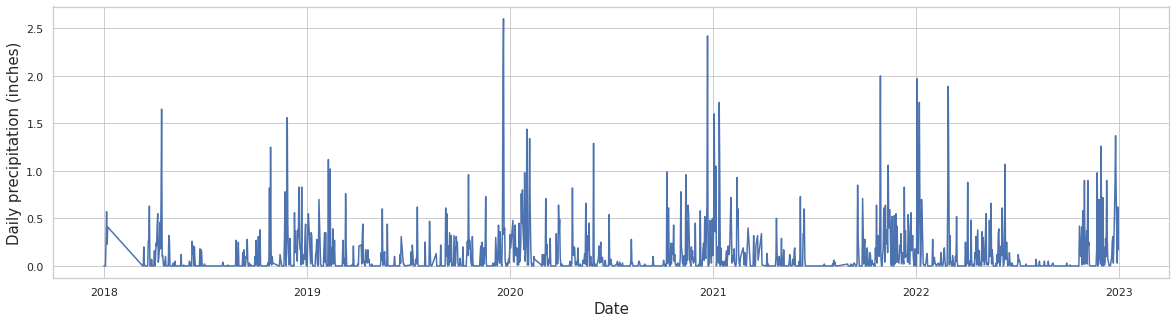

In [ ]:
plt.figure(figsize = (20,5))
sns.lineplot(data = df_seattle, x = 'DATE', y = 'PRCP')

plt.xlabel('Date', fontsize = 15)
plt.ylabel('Daily precipitation (inches)', fontsize = 15);

We can see from the jump early on that many of the missing values are from early in 2018.

We can also see the seasonality.

Plot the daily precipitation data for St Louis.

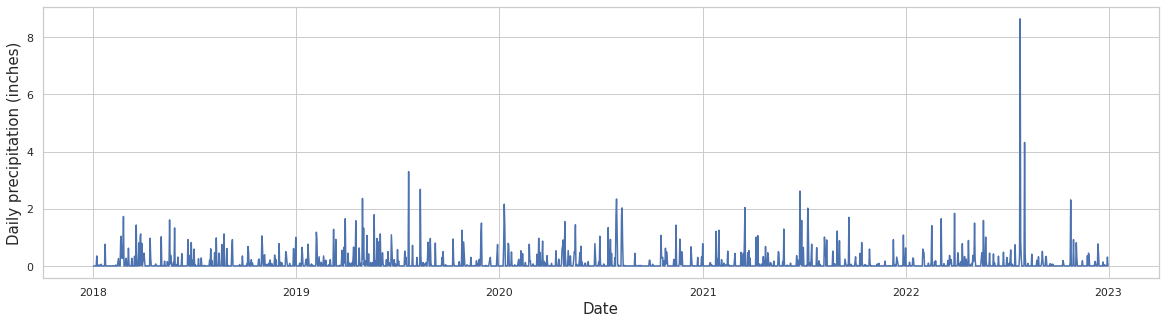

In [ ]:
plt.figure(figsize = (20,5))
sns.lineplot(data = df_stl, x = 'DATE', y = 'PRCP')

plt.xlabel('Date', fontsize = 15)
plt.ylabel('Daily precipitation (inches)', fontsize = 15);

It looks like there was a monsoon sometime in 2022.

In [ ]:
df_stl.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD
51540,USW00013994,"ST LOUIS LAMBERT INTERNATIONAL AIRPORT, MO US",2018-01-01,NaN,NaN,0.0,0.0,0.0
51541,USW00013994,"ST LOUIS LAMBERT INTERNATIONAL AIRPORT, MO US",2018-01-02,NaN,NaN,0.0,0.0,0.0
51542,USW00013994,"ST LOUIS LAMBERT INTERNATIONAL AIRPORT, MO US",2018-01-03,NaN,NaN,0.0,0.0,0.0
51543,USW00013994,"ST LOUIS LAMBERT INTERNATIONAL AIRPORT, MO US",2018-01-04,NaN,NaN,0.0,0.2,0.0
51544,USW00013994,"ST LOUIS LAMBERT INTERNATIONAL AIRPORT, MO US",2018-01-05,NaN,NaN,0.0,0.0,0.0


In [ ]:
df_stl['MONTH'] = pd.DatetimeIndex(df_stl['DATE']).month

df_stl['YEAR'] = pd.DatetimeIndex(df_stl['DATE']).year

In [ ]:
df_stl.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,MONTH,YEAR
51540,USW00013994,"ST LOUIS LAMBERT INTERNATIONAL AIRPORT, MO US",2018-01-01,NaN,NaN,0.0,0.0,0.0,1,2018
51541,USW00013994,"ST LOUIS LAMBERT INTERNATIONAL AIRPORT, MO US",2018-01-02,NaN,NaN,0.0,0.0,0.0,1,2018
51542,USW00013994,"ST LOUIS LAMBERT INTERNATIONAL AIRPORT, MO US",2018-01-03,NaN,NaN,0.0,0.0,0.0,1,2018
51543,USW00013994,"ST LOUIS LAMBERT INTERNATIONAL AIRPORT, MO US",2018-01-04,NaN,NaN,0.0,0.2,0.0,1,2018
51544,USW00013994,"ST LOUIS LAMBERT INTERNATIONAL AIRPORT, MO US",2018-01-05,NaN,NaN,0.0,0.0,0.0,1,2018


In [ ]:
df_seattle['MONTH'] = pd.DatetimeIndex(df_seattle['DATE']).month

df_seattle['YEAR'] = pd.DatetimeIndex(df_seattle['DATE']).year

In [ ]:
df_seattle.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF,MONTH,YEAR
0,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-01,NaN,NaN,0.00,NaN,NaN,NaN,NaN,1,2018
1,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-02,NaN,NaN,0.00,NaN,NaN,NaN,NaN,1,2018
2,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-03,NaN,NaN,0.00,NaN,NaN,NaN,NaN,1,2018
3,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-04,NaN,NaN,0.00,NaN,NaN,NaN,NaN,1,2018
4,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-05,NaN,NaN,0.25,NaN,NaN,NaN,NaN,1,2018


In [ ]:
#type(df_stl.loc[0,'DATE'])

In [ ]:
df_stl[['MONTH', 'PRCP']].groupby('MONTH').mean()

,PRCP
MONTH,
1,0.102065
2,0.118298
3,0.171355
4,0.143733
5,0.174839
6,0.117200
7,0.225419
8,0.169871
9,0.062333


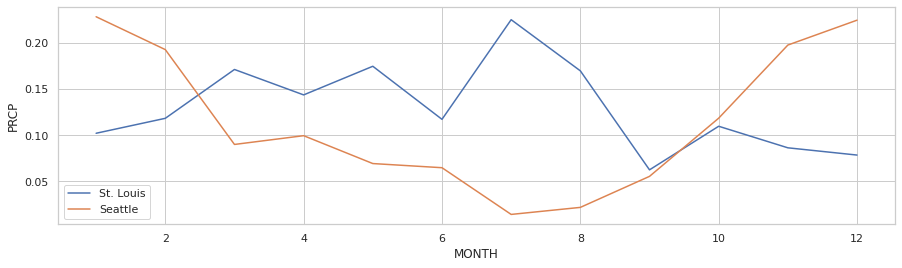

In [ ]:
plt.figure(figsize = (15,4))

sns.lineplot(data = df_stl[['MONTH', 'PRCP']].groupby('MONTH').mean(), x = 'MONTH', y = 'PRCP')

sns.lineplot(data = df_seattle[['MONTH', 'PRCP']].groupby('MONTH').mean(), x = 'MONTH', y = 'PRCP')

plt.legend(['St. Louis', 'Seattle']);

Compare the mean daily precipitation

In [ ]:
df_seattle['PRCP'].mean()

0.11185207823960881

In [ ]:
df_stl['PRCP'].mean()

0.13034501642935378

In [ ]:
df_stl.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,MONTH,YEAR
51540,USW00013994,"ST LOUIS LAMBERT INTERNATIONAL AIRPORT, MO US",2018-01-01,NaN,NaN,0.0,0.0,0.0,1,2018
51541,USW00013994,"ST LOUIS LAMBERT INTERNATIONAL AIRPORT, MO US",2018-01-02,NaN,NaN,0.0,0.0,0.0,1,2018
51542,USW00013994,"ST LOUIS LAMBERT INTERNATIONAL AIRPORT, MO US",2018-01-03,NaN,NaN,0.0,0.0,0.0,1,2018
51543,USW00013994,"ST LOUIS LAMBERT INTERNATIONAL AIRPORT, MO US",2018-01-04,NaN,NaN,0.0,0.2,0.0,1,2018
51544,USW00013994,"ST LOUIS LAMBERT INTERNATIONAL AIRPORT, MO US",2018-01-05,NaN,NaN,0.0,0.0,0.0,1,2018


## Merge

In [ ]:
pd.merge?

In [ ]:
df_stl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1826 entries, 51540 to 53365
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STATION  1826 non-null   object        
 1   NAME     1826 non-null   object        
 2   DATE     1826 non-null   datetime64[ns]
 3   DAPR     0 non-null      float64       
 4   MDPR     0 non-null      float64       
 5   PRCP     1826 non-null   float64       
 6   SNOW     1826 non-null   float64       
 7   SNWD     1826 non-null   float64       
 8   MONTH    1826 non-null   int64         
 9   YEAR     1826 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(2), object(2)
memory usage: 156.9+ KB


In [ ]:
df_seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658 entries, 0 to 1657
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STATION  1658 non-null   object        
 1   NAME     1658 non-null   object        
 2   DATE     1658 non-null   datetime64[ns]
 3   DAPR     23 non-null     float64       
 4   MDPR     23 non-null     float64       
 5   PRCP     1636 non-null   float64       
 6   SNOW     353 non-null    float64       
 7   SNWD     66 non-null     float64       
 8   WESD     15 non-null     float64       
 9   WESF     28 non-null     float64       
 10  MONTH    1658 non-null   int64         
 11  YEAR     1658 non-null   int64         
dtypes: datetime64[ns](1), float64(7), int64(2), object(2)
memory usage: 155.6+ KB


In [ ]:
df = df_stl[['DATE', 'PRCP']].merge(df_seattle[['DATE', 'PRCP']], on = 'DATE')

df.head()

,DATE,PRCP_x,PRCP_y
0,2018-01-01,0.0,0.00
1,2018-01-02,0.0,0.00
2,2018-01-03,0.0,0.00
3,2018-01-04,0.0,0.00
4,2018-01-05,0.0,0.25


In [ ]:
df = pd.melt(df, id_vars = 'DATE', var_name = 'CITY', value_name = 'PRCP')

In [ ]:
df.loc[df['CITY'] == 'PRCP_x','CITY'] = 'STL'

df.loc[df['CITY'] == 'PRCP_y','CITY'] = 'SEA'

In [ ]:
df.head()

,DATE,CITY,PRCP
0,2018-01-01,STL,0.0
1,2018-01-02,STL,0.0
2,2018-01-03,STL,0.0
3,2018-01-04,STL,0.0
4,2018-01-05,STL,0.0


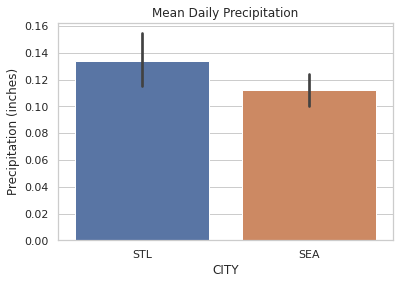

In [ ]:
sns.barplot(data = df, x = 'CITY', y = 'PRCP')

plt.ylabel('Precipitation (inches)')
plt.title('Mean Daily Precipitation');

In [ ]:
df.head()

,DATE,CITY,PRCP
0,2018-01-01,STL,0.0
1,2018-01-02,STL,0.0
2,2018-01-03,STL,0.0
3,2018-01-04,STL,0.0
4,2018-01-05,STL,0.0


In [ ]:
df['MONTH'] = pd.DatetimeIndex(df['DATE']).month

df['YEAR'] = pd.DatetimeIndex(df['DATE']).year

In [ ]:
df['RAIN'] = df['PRCP'] > 0

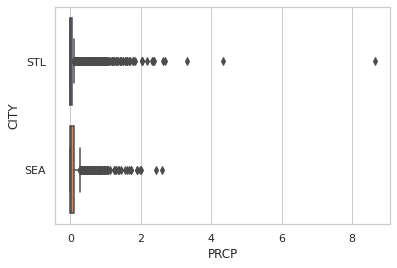

In [ ]:
sns.boxplot(data = df, x = 'PRCP', y = 'CITY', orient='h')

In [ ]:
df['SIG_RAIN'] = df['PRCP'] > 0.4 #0.4 inches is roughly 10mm

In [ ]:
df.head()

,DATE,CITY,PRCP,MONTH,YEAR,RAIN,SIG_RAIN
0,2018-01-01,STL,0.0,1,2018,False,False
1,2018-01-02,STL,0.0,1,2018,False,False
2,2018-01-03,STL,0.0,1,2018,False,False
3,2018-01-04,STL,0.0,1,2018,False,False
4,2018-01-05,STL,0.0,1,2018,False,False


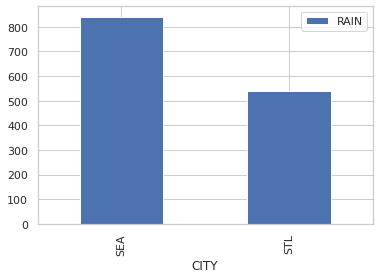

In [ ]:
df[['CITY','RAIN']].groupby('CITY').sum().plot(kind = 'bar');

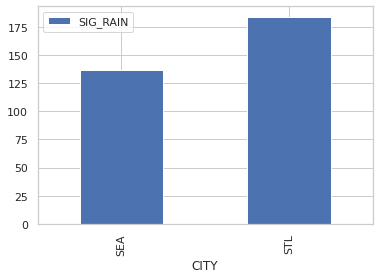

In [ ]:
df[['CITY','SIG_RAIN']].groupby('CITY').sum().plot(kind = 'bar');

In [ ]:
#!pip install pyjanitor -q

In [ ]:
#from janitor import clean_names
#import janitor

TypeError: ignored

# Skills

1.  pd.read_csv
2.  head
3.  variable types
4.  info
5.  datetime
6.  changing data types
7.  






# Preclass 1

## Import libraries

In [ ]:
# Import pandas, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# seaborn is a data visualization library built on matplotlib
import seaborn as sns 

# set the plotting style 
sns.set_style("whitegrid")

## Import and examine the data set from Our World in Data

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv')

In [ ]:
df.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.121,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3769828.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.118,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3787706.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.116,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3806634.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.115,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3825655.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.114,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46523 entries, 0 to 46522
Data columns (total 74 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    46523 non-null  object 
 1   year                                       46523 non-null  int64  
 2   iso_code                                   39862 non-null  object 
 3   population                                 38574 non-null  float64
 4   gdp                                        14551 non-null  float64
 5   cement_co2                                 24974 non-null  float64
 6   cement_co2_per_capita                      22714 non-null  float64
 7   co2                                        31349 non-null  float64
 8   co2_growth_abs                             28944 non-null  float64
 9   co2_growth_prct                            25032 non-null  float64
 10  co2_including_luc     

## New section